We will make a simple toy space that has a few non-trivial features. Specifically, we will place an object $h$ (just a square patch of size $[-a, a] \times [-a, a]$) with intensity $I$ centered at position $(r, \theta)$ where
\begin{align}
%
    \theta &\sim \mathrm{Unif}[0, 2 \pi] \\
    r &\sim \mathcal{N}( \mu, \sigma^2 ) \\
    I &\sim \mathrm{Cat}(K, p)
%
\end{align}
to start $K = [1, 2]$ and $p = [0.5, 0.5]$, ie the square has a 50/50 chance of being "bright" or "dim".

Then we also optionally add some white Gaussian noise $\mathcal{N}(0, \epsilon^2)$ to every pixel in the receptive field.

In [62]:
import numpy as np
from matplotlib import pyplot as plt
import h5py

In [79]:
# model parameters

field_shape = (32+1, 32+1)
n_samples   = 10000

a       = 1 # box size
mu      = 9.0
sigma   = 1.5
K       = np.array([1, 2])
p       = np.ones(len(K)) / float(len(K))
epsilon = 0.0

In [80]:
# generate some images

data = np.zeros((n_samples,) + field_shape)

for s in range(n_samples):
    
    # draw from our distributions
    r     = np.random.randn(1)[0] * sigma + mu
    theta = np.random.uniform(0, 2.0*np.pi)
    I     = np.random.choice(K, p=p)
    
    # compute the center pixel of the patch
    c = r * np.array([np.cos(theta), np.sin(theta)]) + (np.array(field_shape)+1)/2
    c = c.astype(np.int)
    
    # add the patch
    data[s,c[0]-a:c[0]+a,c[1]-a:c[1]+a] = I
    
    # add noise
    data[s] += epsilon * np.random.randn(*field_shape)

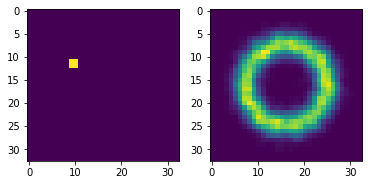

In [81]:
plt.figure()
plt.subplot(121)
plt.imshow(data[0])
plt.subplot(122)
plt.imshow(data.mean(0).T)
plt.show()

In [82]:
# save the simulation as an HDF5 image stack
# put the parameters inside for safe keeping :)

f = h5py.File('circle_sim_1.h5', 'w')
f['data'] = data
f['params/a']       = a
f['params/mu']      = mu
f['params/sigma']   = sigma
f['params/K']       = K
f['params/p']       = p
f['params/epsilon'] = epsilon
f.close()

For a second toy model, we break the orthogonality of $r$ and $\theta$ by introducing a dependency,
\begin{align}
%
    \theta &\sim \mathrm{Unif}[0, 2 \pi] \\
    r &\sim \mathcal{N}( \mu \sqrt{ \cos^2 \theta + \frac{1}{2} \sin^2 \theta}, \sigma^2 ) \\
    I &\sim \mathrm{Cat}(K, p)
%
\end{align}
Now, the radius changes as a function of the angle. This means that the resulting distribution of the cube is elliptical. 

In [83]:
# model parameters are the same as before

In [84]:
# generate some images

data = np.zeros((n_samples,) + field_shape)

for s in range(n_samples):
    
    # draw from our distributions
    theta = np.random.uniform(0, 2.0*np.pi)
    mu_s  = mu * np.sqrt(np.cos(theta)**2 + 0.5 * np.sin(theta)**2)
    r     = np.random.randn(1)[0] * sigma + mu_s
    I     = np.random.choice(K, p=p)
    
    # compute the center pixel of the patch
    c = r * np.array([np.cos(theta), np.sin(theta)]) + (np.array(field_shape)+1)/2
    c = c.astype(np.int)
    
    # add the patch
    data[s,c[0]-a:c[0]+a,c[1]-a:c[1]+a] = I
    
    # add noise
    data[s] += epsilon * np.random.randn(*field_shape)

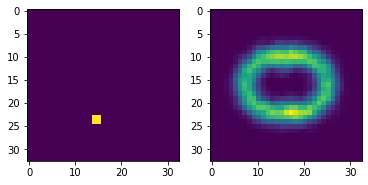

In [85]:
plt.figure()
plt.subplot(121)
plt.imshow(data[0])
plt.subplot(122)
plt.imshow(data.mean(0).T)
plt.show()

In [86]:
# save the simulation as an HDF5 image stack
# put the parameters inside for safe keeping :)

f = h5py.File('ellipse_sim_1.h5', 'w')
f['data'] = data
f['params/a']       = a
f['params/mu']      = mu
f['params/sigma']   = sigma
f['params/K']       = K
f['params/p']       = p
f['params/epsilon'] = epsilon
f.close()